# Recognition of Yoga Postures

## Necessary libraries
We choose
[Pytorch](https://pytorch.org/)
as our framework for this project for its learning parh and It is Simple GPU installation.
And we are going to work with

In [16]:
import os
import shutil
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from utils import split_data
from fastai.vision.all import get_image_files,verify_images


In [17]:
# check if CUDA is available to use GPU on the training 
train_on_gpu = tf.test.is_gpu_available()

if train_on_gpu:
    print('GPU con soporte CUDA disponible')
else:
    print('No se encontró GPU con soporte CUDA')

No se encontró GPU con soporte CUDA


In [37]:
images=get_image_files('../YOGA/dataset')
images
failed = verify_images(images)
failed

(#1) [Path('../YOGA/dataset/training/tree/00000114.jpg')]

In [38]:
images=get_image_files('../YOGA/DATA')
images
failed = verify_images(images)
failed

(#1) [Path('../YOGA/DATA/tree/00000114.jpg')]

In [39]:
# Define paths
downdog_SRC_DIR = "data/downdog"
goddess_SRC_DIR = "data/goddess"
plank_SRC_DIR = "data/plank"
tree_SRC_DIR = "data/tree"
warrior_SRC_DIR = "data/warrior"
TRAINING_DIR = "dataset/training"
VALIDATION_DIR = "dataset/validation"
TEST_DIR = "dataset/test"
#splitting the dataset
TRAINING_DDG_DIR = os.path.join(TRAINING_DIR, "downdog/")
VALIDATION_DDG_DIR = os.path.join(VALIDATION_DIR, "downdog/")
TEST_DDG_DIR = os.path.join(TEST_DIR, "downdog/")

TRAINING_GDS_DIR = os.path.join(TRAINING_DIR, "goddess/")
VALIDATION_GDS_DIR = os.path.join(VALIDATION_DIR, "goddess/")
TEST_GDS_DIR = os.path.join(TEST_DIR, "goddess/")

TRAINING_PLANK_DIR = os.path.join(TRAINING_DIR, "plank/")
VALIDATION_PLANK_DIR = os.path.join(VALIDATION_DIR, "plank/")
TEST_PLANK_DIR = os.path.join(TEST_DIR, "plank/")

TRAINING_TREE_DIR = os.path.join(TRAINING_DIR, "tree/")
VALIDATION_TREE_DIR = os.path.join(VALIDATION_DIR, "tree/")
TEST_TREE_DIR = os.path.join(TEST_DIR, "tree/")

TRAINING_WR_DIR = os.path.join(TRAINING_DIR, "warrior/")
VALIDATION_WR_DIR = os.path.join(VALIDATION_DIR, "warrior/")
TEST_WR_DIR = os.path.join(TEST_DIR, "warrior/")
# Define proportion of images used for training
train_size = 0.8
val_size = 0.1
test_size = 0.1

split_data(downdog_SRC_DIR,
           TRAINING_DDG_DIR,
           VALIDATION_DDG_DIR,
           TEST_DDG_DIR,
           split_ratio=(train_size,val_size, test_size))

split_data(goddess_SRC_DIR,
           TRAINING_GDS_DIR,
           VALIDATION_GDS_DIR,
           TEST_GDS_DIR,
           split_ratio=(train_size,val_size, test_size))

split_data(plank_SRC_DIR,
           TRAINING_PLANK_DIR,
           VALIDATION_PLANK_DIR,
           TEST_PLANK_DIR,
           split_ratio=(train_size,val_size, test_size))

split_data(tree_SRC_DIR,
           TRAINING_TREE_DIR,
           VALIDATION_TREE_DIR,
           TEST_TREE_DIR,
           split_ratio=(train_size,val_size, test_size))
split_data(warrior_SRC_DIR,
           TRAINING_WR_DIR,
           VALIDATION_WR_DIR,
           TEST_WR_DIR,
           split_ratio=(train_size,val_size, test_size))

Splitting data completed.
Splitting data completed.
Splitting data completed.
Splitting data completed.
Splitting data completed.


In [40]:
print(f"Original Downdog directory has {len(os.listdir(downdog_SRC_DIR))} images")
print(f"Original Goddess directory has {len(os.listdir(goddess_SRC_DIR))} images")
print(f"Original Plank directory has {len(os.listdir(plank_SRC_DIR))} images")
print(f"Original Tree directory has {len(os.listdir(tree_SRC_DIR))} images")
print(f"Original Warrior directory has {len(os.listdir(warrior_SRC_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_DDG_DIR))} images of Dogdown for training")
print(f"There are {len(os.listdir(TRAINING_GDS_DIR))} images of Goddess for training")
print(f"There are {len(os.listdir(TRAINING_PLANK_DIR))} images of Plank for training")
print(f"There are {len(os.listdir(TRAINING_TREE_DIR))} images of Tree for training")
print(f"There are {len(os.listdir(TRAINING_WR_DIR))} images of Warrior for training\n")

print(f"There are {len(os.listdir(VALIDATION_DDG_DIR))} images of Dogdown for validation")           
print(f"There are {len(os.listdir(VALIDATION_GDS_DIR))} images of Goddess for validation")
print(f"There are {len(os.listdir(VALIDATION_PLANK_DIR))} images of Plank for validation")
print(f"There are {len(os.listdir(VALIDATION_TREE_DIR))} images of Tree for validation")
print(f"There are {len(os.listdir(VALIDATION_WR_DIR))} images of Warrior for validation\n")

print(f"There are {len(os.listdir(TEST_DDG_DIR))} images of Dogdown for test")
print(f"There are {len(os.listdir(TEST_GDS_DIR))} images of Goddess for test")
print(f"There are {len(os.listdir(TEST_PLANK_DIR))} images of Plank for test")
print(f"There are {len(os.listdir(TEST_TREE_DIR))} images of Plank for test")
print(f"There are {len(os.listdir(TEST_WR_DIR))} images of tree for test")

Original Downdog directory has 320 images
Original Goddess directory has 260 images
Original Plank directory has 381 images
Original Tree directory has 229 images
Original Warrior directory has 361 images

There are 256 images of Dogdown for training
There are 208 images of Goddess for training
There are 304 images of Plank for training
There are 183 images of Tree for training
There are 288 images of Warrior for training

There are 32 images of Dogdown for validation
There are 26 images of Goddess for validation
There are 38 images of Plank for validation
There are 22 images of Tree for validation
There are 36 images of Warrior for validation

There are 32 images of Dogdown for test
There are 26 images of Goddess for test
There are 39 images of Plank for test
There are 24 images of Plank for test
There are 37 images of tree for test


## Data


In [41]:

# Definir un generador de imágenes con transformaciones
batch_size = 16
width=250
height=224
data_generator = ImageDataGenerator(
    rescale=1.0 / 255,  # Escalar los valores de píxeles al rango [0, 1]
    width_shift_range=0.1,  # Cambios aleatorios de ancho (data augmentation)
    height_shift_range=0.1,  # Cambios aleatorios de alto (data augmentation)
    horizontal_flip=True,  # Voltear horizontalmente las imágenes aleatoriamente (data augmentation)
)

# Cargar imágenes del directorio y aplicar transformaciones
train_data = data_generator.flow_from_directory(
    TRAINING_DIR,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='sparse',  # Para problemas de clasificación multiclase
)

validation_data = data_generator.flow_from_directory(
    VALIDATION_DIR,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='sparse',
)

test_data = data_generator.flow_from_directory(
    TEST_DIR,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='sparse',
)


Found 1239 images belonging to 5 classes.
Found 154 images belonging to 5 classes.
Found 158 images belonging to 5 classes.


In [42]:
for data, labels in validation_data:
    print(labels)
    # Aquí puedes agregar más código para inspeccionar los datos y etiquetas
    break  # Detenemos el ciclo después de imprimir las etiquetas de un lote


[2. 4. 3. 4. 1. 4. 3. 3. 0. 2. 0. 4. 1. 3. 1. 0.]


In [43]:
train_data

Observemos una imagen 

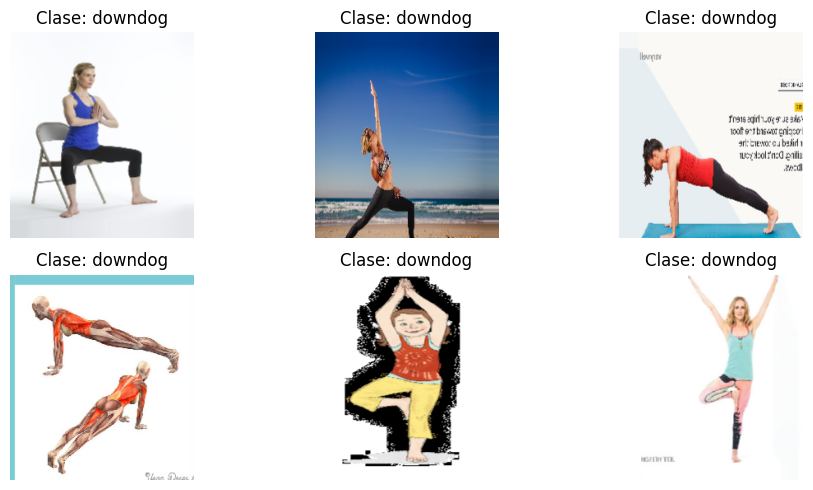

In [44]:

# Obtener un lote de imágenes y etiquetas del generador de datos
images, labels = next(train_data)

# Etiquetas de las clases (nombre de las carpetas)
class_labels = list(train_data.class_indices.keys())

# Configurar subplots
num_images = 6
num_cols = 3 # Número de columnas en la cuadrícula
num_rows = (num_images + num_cols - 1) // num_cols  # Calcular el número de filas necesarias

# Crear una cuadrícula de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Iterar a través de las imágenes y subplots
for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        image = images[i]
        label = class_labels[labels[i].argmax()]
        
        ax.imshow(image)
        ax.set_title(f"Clase: {label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [45]:
class Net(models.Model):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(pool_size=(2, 2))

        self.conv2 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(pool_size=(2, 2))

        self.conv3 = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(pool_size=(2, 2))

        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(32, activation='relu')
        self.dropout1 = layers.Dropout(0.25)
        self.bn_fc1 = layers.BatchNormalization()

        self.fc2 = layers.Dense(5, activation='softmax')  
        self.dropout2 = layers.Dropout(0.25)
        self.bn_fc2 = layers.BatchNormalization()

    def call(self, x):
        # Pasada a través de las capas convolucionales y pooling
        x = self.pool1(self.bn1(self.conv1(x)))
        x = self.pool2(self.bn2(self.conv2(x)))
        x = self.pool3(self.bn3(self.conv3(x)))

        x = self.flatten(x)  # Aplanar el tensor

        x = self.dropout1(x)
        x = self.fc1(x)
        x = self.bn_fc1(x)

        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.bn_fc2(x)
        return x


In [46]:
model = Net()


In [47]:
from tensorflow.keras.losses import categorical_crossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.legacy import Adam

criterion = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)

In [48]:
for data, target in train_data:
    print(data)
    print(target)
    break

[[[[0.9607844  0.9607844  0.9607844 ]
   [0.9607844  0.9607844  0.9607844 ]
   [0.9607844  0.9607844  0.9607844 ]
   ...
   [0.89391637 0.89391637 0.89391637]
   [0.89153665 0.89153665 0.89153665]
   [0.89019614 0.89019614 0.89019614]]

  [[0.9607844  0.9607844  0.9607844 ]
   [0.9607844  0.9607844  0.9607844 ]
   [0.9607844  0.9607844  0.9607844 ]
   ...
   [0.89238954 0.89238954 0.89238954]
   [0.89133525 0.89133525 0.89133525]
   [0.8898084  0.8898084  0.8898084 ]]

  [[0.96137345 0.96137345 0.96137345]
   [0.96137345 0.96137345 0.96137345]
   [0.96137345 0.96137345 0.96137345]
   ...
   [0.89019614 0.89019614 0.89019614]
   [0.89019614 0.89019614 0.89019614]
   [0.88800275 0.88800275 0.88800275]]

  ...

  [[0.90196085 0.8980393  0.89019614]
   [0.90196085 0.8980393  0.89019614]
   [0.90196085 0.8980393  0.89019614]
   ...
   [0.8862746  0.8862746  0.8862746 ]
   [0.8836935  0.8836935  0.8836935 ]
   [0.882353   0.882353   0.882353  ]]

  [[0.90196085 0.8980393  0.89019614]
   [0.9

In [49]:
print(len(train_data))

78


In [50]:
print(len(validation_data))

10


In [51]:
print(len(test_data))

10


In [52]:
num_epochs = 10
valid_loss_min = float('inf')
train_losses, valid_losses = [], []

for epoch in range(1, num_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    for data, target in train_data:
        with tf.GradientTape() as tape:
            output = model(data, training=True)
            loss = criterion(target, output)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        train_loss += loss.numpy() * data.shape[0]

    # Validate the model
    for data, target in validation_data:
        output = model(data, training=False)
        loss = criterion(target, output)
        valid_loss += loss.numpy() * data.shape[0]

    # Calculate average losses
    train_loss = train_loss / len(test_data)
    valid_loss = validation_data / len(validation_data)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    # Print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # Early stopping and save model
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(
            valid_loss_min,
            valid_loss))
        model.save_weights('yoga.h5')
        valid_loss_min = valid_loss

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
x = torch.randn(1, 3, 1000, 700)  # simulates an input image
x = net.conv1(x)
x = net.pool(x)
x = net.conv2(x)
x = net.pool(x)
print(x.shape)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0


In [ ]:
# Cargar el conjunto de validación
validationset = torchvision.datasets.ImageFolder(root=PATH_TEST, transform=transform)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=4, shuffle=True, num_workers=2)

# Pasar el modelo a modo de evaluación
net.eval()

correct = 0
total = 0

# No necesitamos calcular los gradientes, ya que no estamos entrenando la red
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the validation images: %d %%' % (
    100 * correct / total))
